# Модель машинного обучения для детекции и предотвращения мошенничества в кредитных операциях

**Автор: Кузьмин Дмитрий**

# Проблема мошеннических операций

Мошенничество существует с тех пор, как существует человечество, и может принимать бесконечное множество различных форм. Кроме того, развитие новых технологий предоставляет преступникам дополнительные способы совершения мошенничества, например, в электронной коммерции

Использование кредитных карт широко распространено в современном обществе, и мошенничество с кредитными картами неуклонно растет в последние годы. Финансовые потери из-за мошенничества затрагивают не только банки, но и отдельных клиентов. Если банк теряет деньги, клиенты в конечном итоге тоже платят через более высокие процентные ставки, повышенные членские взносы и т.д.

Обнаружение мошенничества — это процесс определения, принадлежит ли новая авторизованная транзакция к мошенническим или подлинным транзакциям, исходя из набора кредитных карт транзакций. Система обнаружения мошенничества (FDS) должна не только эффективно выявлять случаи мошенничества, но и быть экономически эффективной в том смысле, что стоимость, затрачиваемая на проверку транзакций, не должна превышать потери от мошенничества.

Техники машинного обучения базируются на выводе модели предсказания на основе набора примеров. Эта модель, чаще всего параметрическая функция, позволяет предсказывать вероятность того, что транзакция является мошенничеством, на основе набора характеристик, описывающих транзакцию. В области обнаружения мошенничества использование техник обучения привлекательно по ряду причин. 

1. Они позволяют обнаруживать закономерности в данных с высокой размерностью, т.е. транзакции поступают в виде непрерывного потока и каждая транзакция определяется многими переменными.
2. Мошеннические транзакции часто коррелируют во времени и пространстве. Например, мошенники обычно пытаются совершить аферы в одном магазине с разными картами в течение короткого периода времени.
3. Методы обучения могут использоваться для обнаружения и моделирования существующих мошеннических стратегий, а также для выявления новых стратегий, связанных с необычным поведением владельцев карт.

Предсказательные модели, основанные на методах ML, также способны автоматически интегрировать обратную связь следователей для улучшения точности обнаружения, в то время как в случае экспертных систем включение обратной связи требует пересмотра правил, что может быть утомительным и трудоемким.


# О наборе данных 

Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт. Он содержит только числовые входные переменные, которые являются результатом преобразования PCA.

Он содержит 31 числовую входную переменную. Признак `Time` обозначает количество секунд, прошедших между каждой транзакцией и первой транзакцией в наборе данных. Признак `Amount` — сумма транзакции, которая может использоваться, например, в задачах обучения с учетом затрат.

Признак `Class` является целевой переменной и принимает значение 1 при мошенничестве и 0 — в противном случае.

Набор данных сильно несбалансирован: мошенничество составляет 0,172% от всех транзакций (492 мошеннические транзакции из 284 807). Также отсутствует идентификатор владельца карты, поэтому каждую транзакцию можно рассматривать как независимую от остальных.

Из-за дисбаланса классов наши модели классификации будут считать, что в большинстве случаев мошенничество отсутствует! Нам нужно, чтобы модель была уверена при выявлении мошенничества. Чтобы избежать переобучения мы будем использовать подвыборки для обучения модели. В этом случае наша подвыборка будет датафреймом с соотношением 50/50 мошеннических и немошеннических транзакций.

То есть будем использовать деление набора на train | test при помощи Кросс-Валидаций для того, чтобы избежать дисбаланса классов и обучать модели на подвыборках 50/50


## Импорт библиотек

In [65]:
import warnings, os, json, math, sys
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer, f1_score, roc_curve, roc_auc_score, precision_score, recall_score

## Чтение данных

In [2]:
df = pd.read_csv('../data/creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Предварительная очистка данных

### Пропущенные значения

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Ура, в нашем наборе нету пропущенных значений

### Дубликаты

In [6]:
print(f'Количество дубликатов в наборе данных: {df.duplicated().sum()}')

Количество дубликатов в наборе данных: 1081


In [7]:
df = df.drop_duplicates()
df.shape

(283726, 31)

### Дисбаланс классов

In [8]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

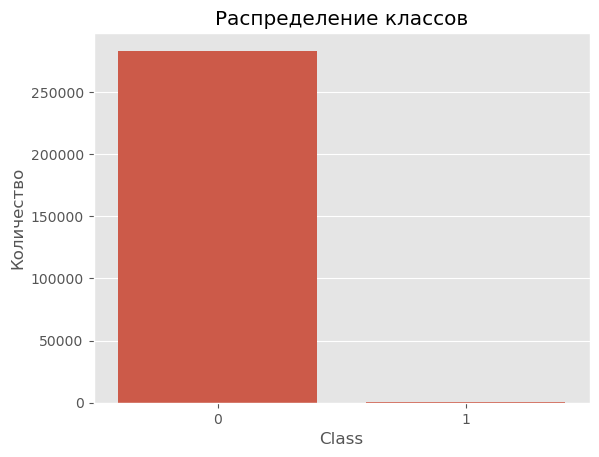

In [9]:
sns.countplot(data=df, x='Class')
plt.title('Распределение классов')
plt.xlabel('Class')
plt.ylabel('Количество')

Когда данные несбалансированы, стандартные алгоритмы машинного обучения, максимизирующие общую точность, склонны классифицировать все наблюдения как экземпляры большинства класса. Это приводит к низкой точности для меньшинственного класса

Обучение на несбалансированных наборах данных является сложной задачей, так как большинство алгоритмов обучения не предназначены для работы с большой разницей между числом случаев, принадлежащих к разным классам

### Выбросы

В задачах, подобных обнаружению мошенничества, выбросы часто и есть тот самый миноритарный класс, который мы хотим найти. Если мы будем относиться к выбросам без должной осторожности, то рискуем потерять важные данные для обучения нашей модели. Например, при удалении мошеннических транзакций на большую сумму наша модель перестает понимать, что мошенники способны переводить крупные суммы со счетов, то есть мы теряем тех самых "китов"

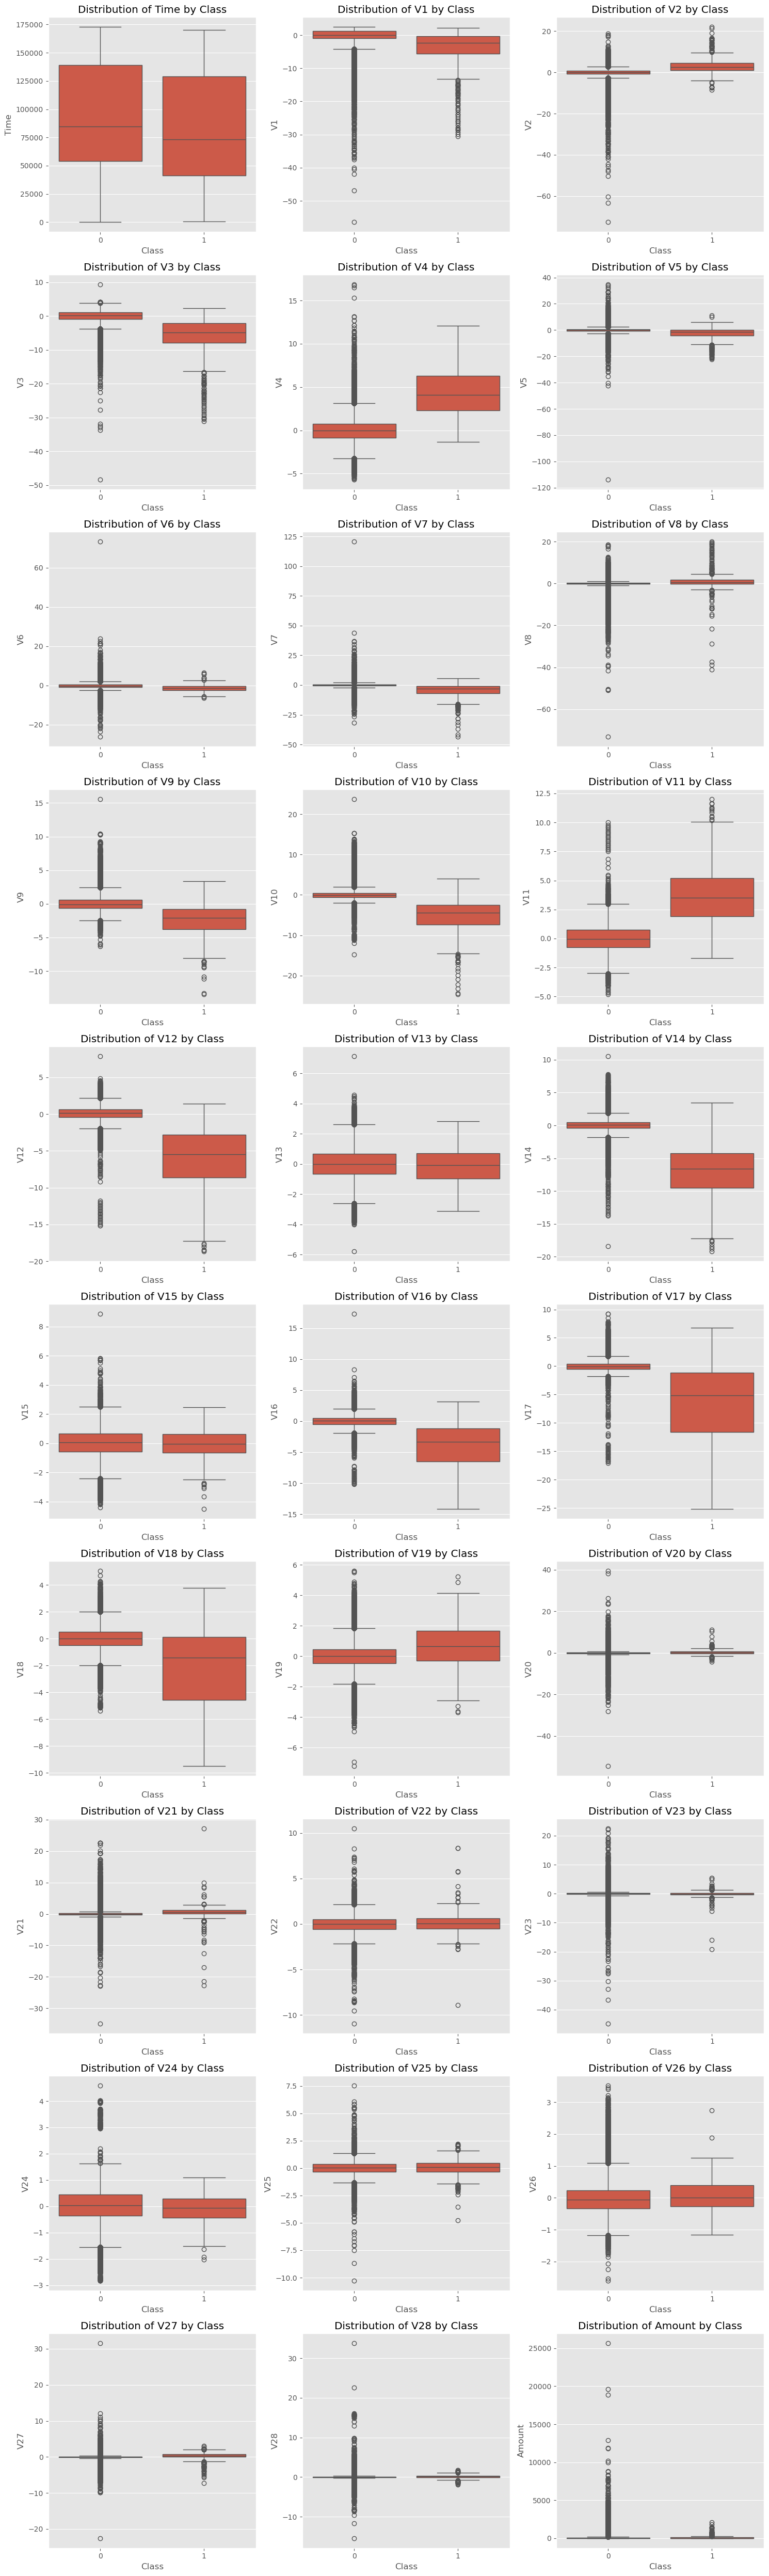

In [10]:
df_num = df.select_dtypes(exclude='object')
features = [col for col in df_num.columns if col != 'Class']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes]

for i, feature in enumerate(features):
    sns.boxplot(data=df_num, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')
    
for i in range(len(features), len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()

In [11]:
def find_outliers(df):
    outliers = []
    for col in df.select_dtypes(include=np.number):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers.extend(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)].index)
    return list(set(outliers))

In [12]:
outliers = find_outliers(df)
print(f"Количество выбросов: {len(outliers)}")
print(f"Процент выбросов от набора данных: {round(len(outliers)/len(df) * 100, 1)}%")

Количество выбросов: 137788
Процент выбросов от набора данных: 48.6%


Удалив выбросы, мы потеряем 48.6% очень важных данных. Мы не будем этого делать. Вместо этого мы будем использовать робастный алгоритмы для масштабирования признаков. RobustScaler помогает уменьшить влияние выбросов, сохраняя важную информацию в данных

## Оценка корреляций признаков с целевой переменной

In [13]:
df.corr()["Class"].sort_values()

V17      -0.313498
V14      -0.293375
V12      -0.250711
V10      -0.206971
V16      -0.187186
V3       -0.182322
V7       -0.172347
V18      -0.105340
V1       -0.094486
V9       -0.094021
V5       -0.087812
V6       -0.043915
Time     -0.012359
V24      -0.007210
V23      -0.006333
V13      -0.003897
V15      -0.003300
V25       0.003202
V26       0.004265
V22       0.004887
Amount    0.005777
V28       0.009682
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V2        0.084624
V4        0.129326
V11       0.149067
Class     1.000000
Name: Class, dtype: float64

<Axes: title={'center': 'Наиболее значимые признаки'}>

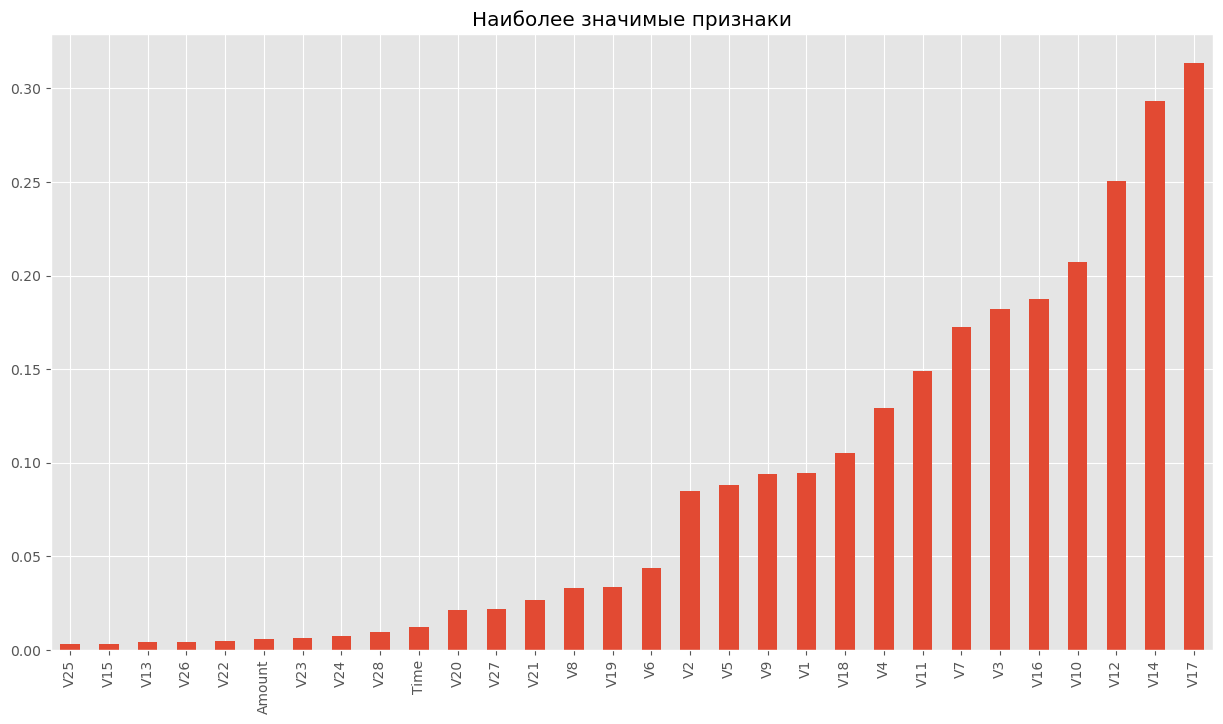

In [14]:
plt.figure(figsize=(15,8))
df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Наиболее значимые признаки')

In [15]:
print(f" Наиболее значимые признаки в датасете: {list(df.corr()['Class'][df.corr()['Class'] < -0.15].index)}")

 Наиболее значимые признаки в датасете: ['V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17']


## Визуализация данных

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

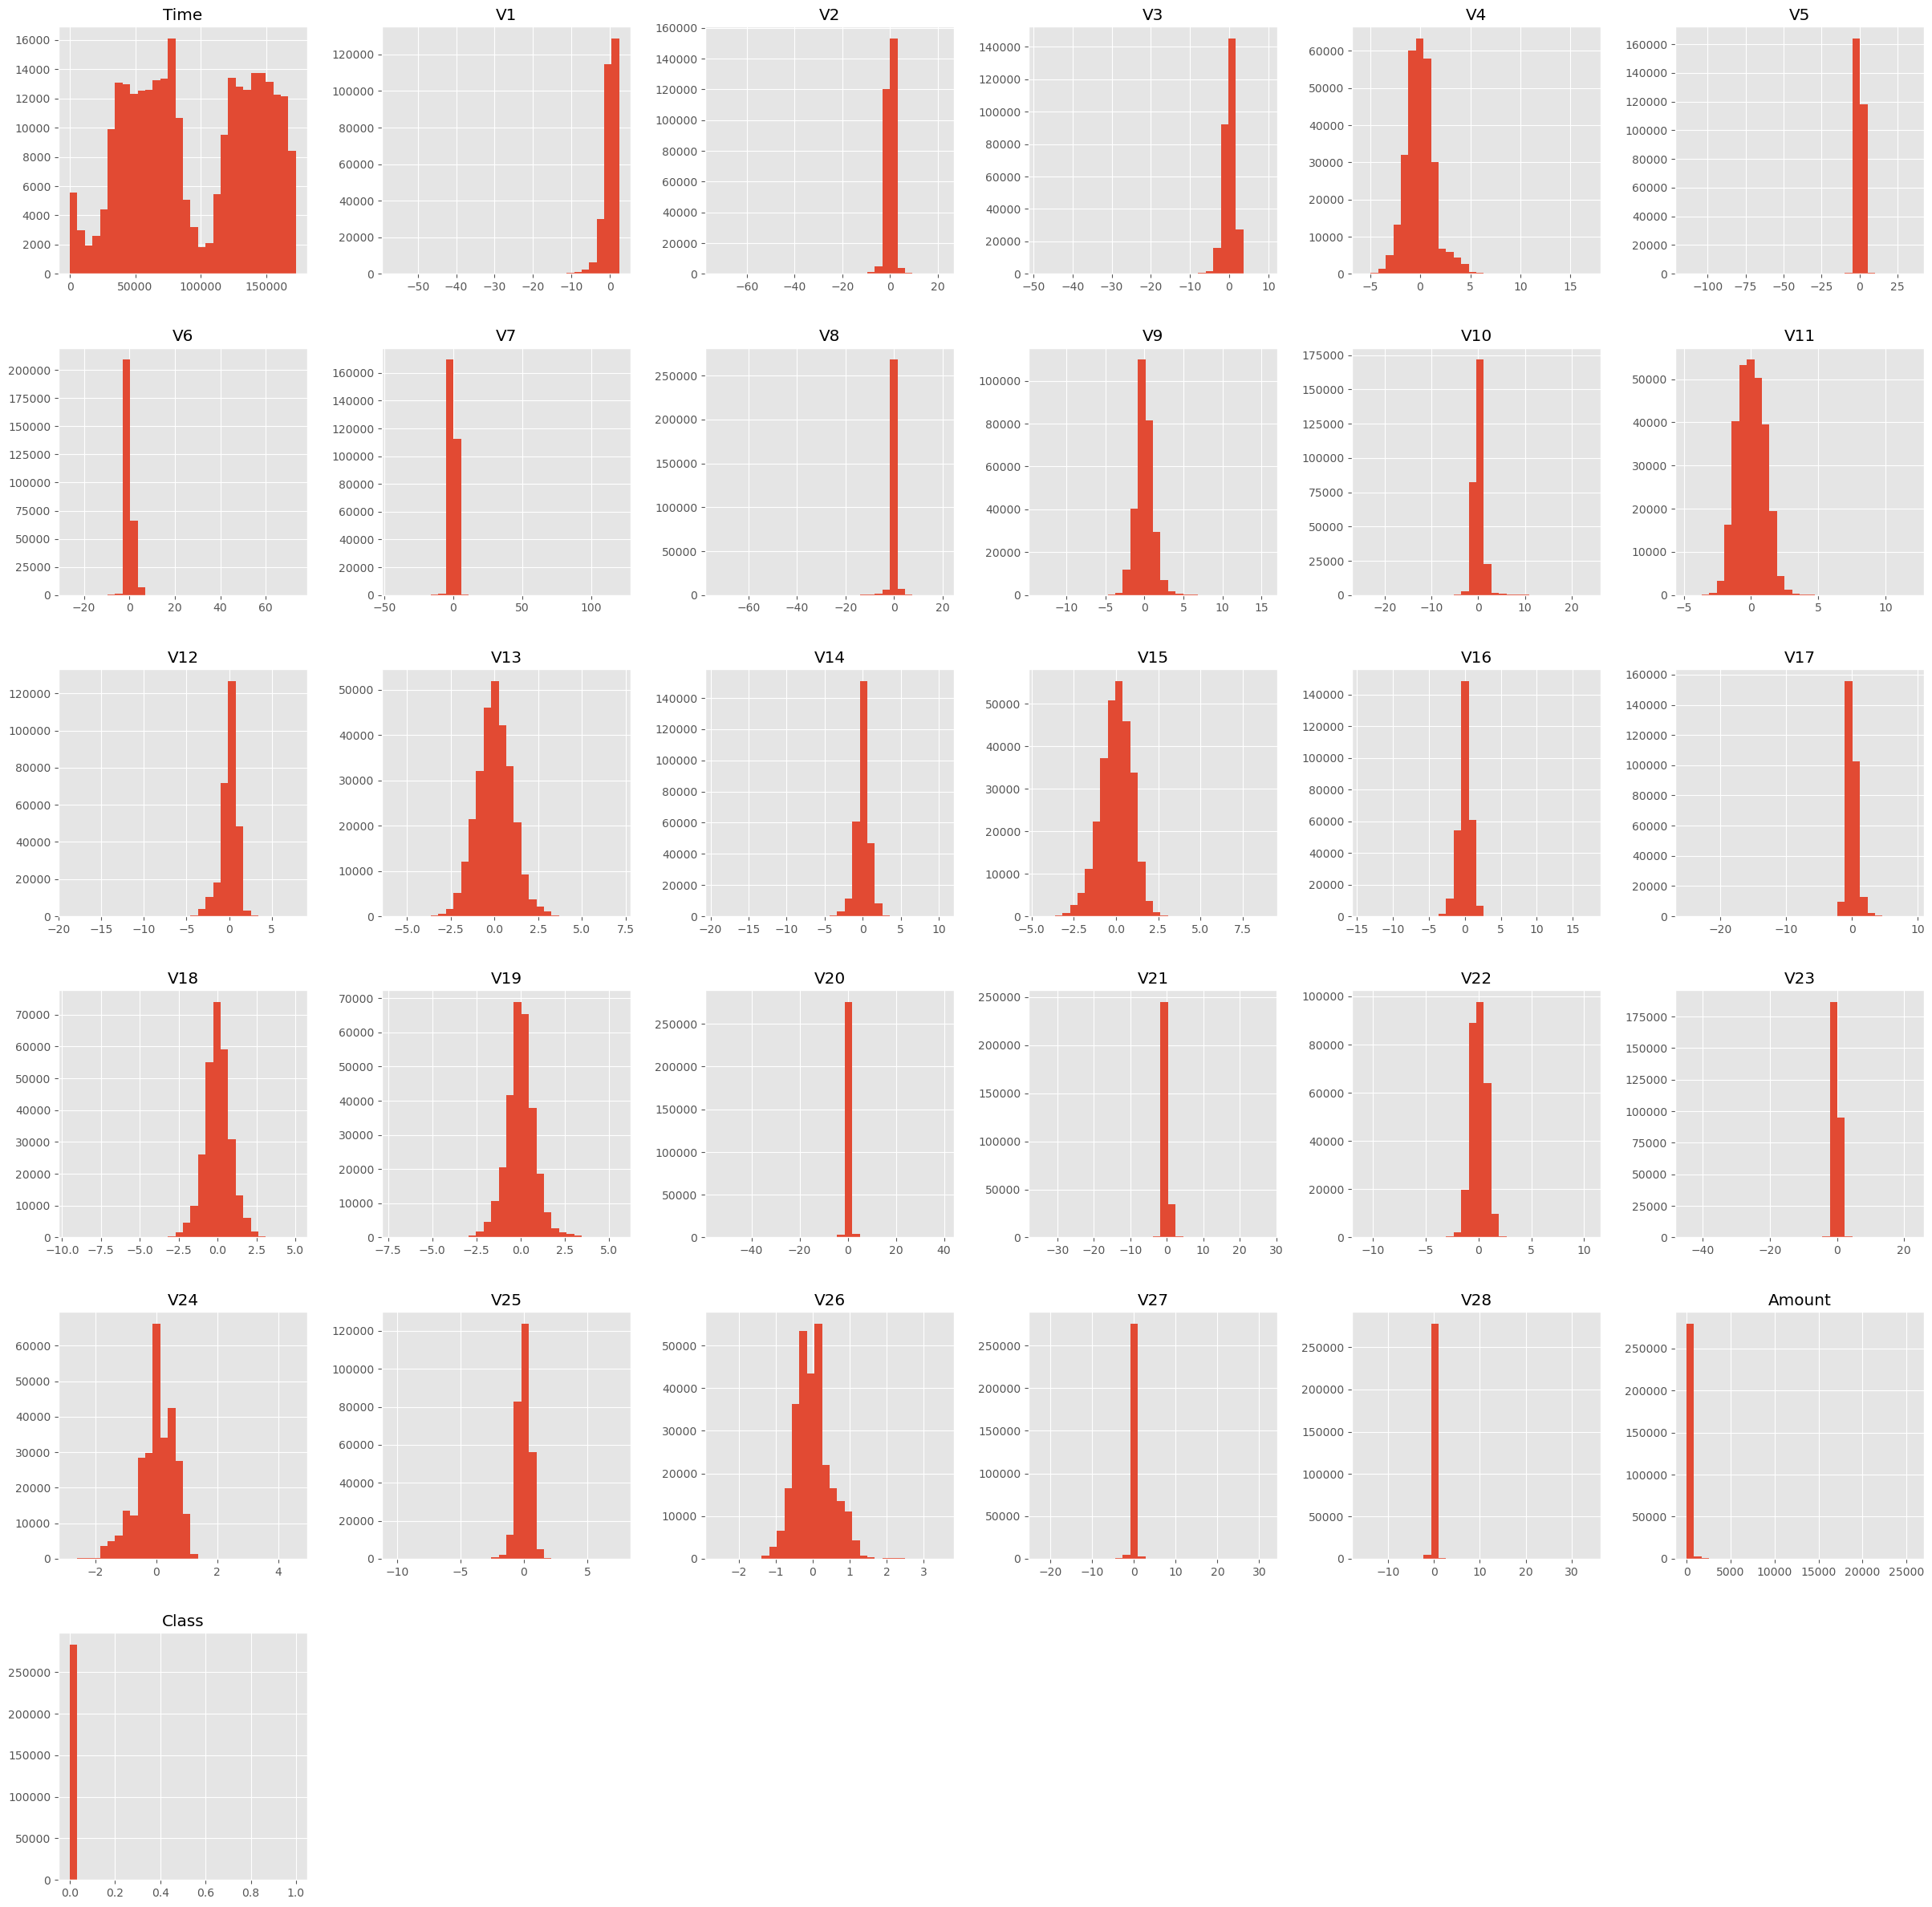

In [16]:
df.hist(bins=30, figsize=(30,30))

Text(0, 0.5, 'Частота')

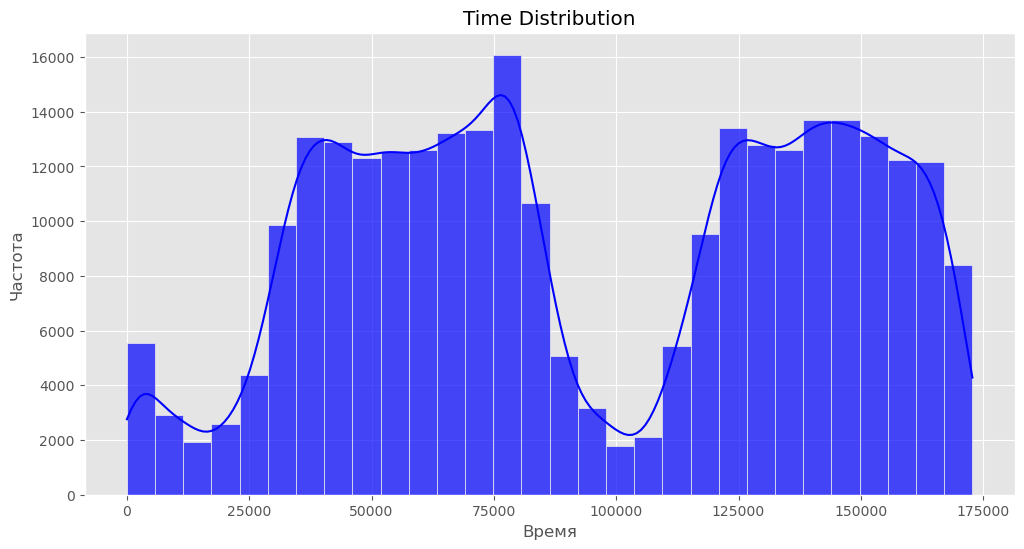

In [17]:
plt.figure(figsize=(12, 6))

class_0 = df[df['Class'] == 0]['Time']
class_1 = df[df['Class'] == 1]['Time']


sns.histplot(class_0, bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Time Distribution')
plt.xlabel('Время')
plt.ylabel('Частота')

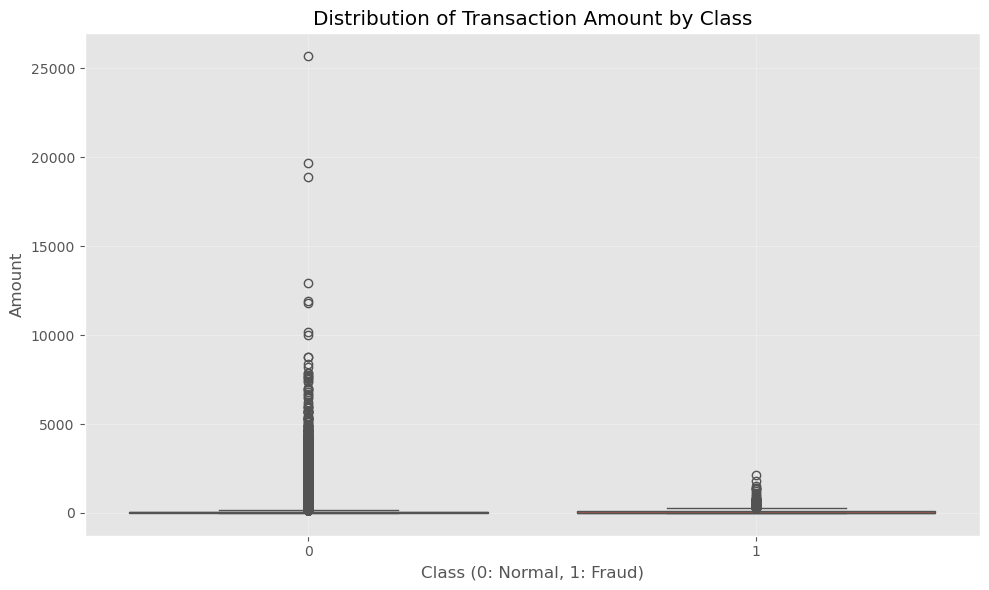

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Масштабирование признаков при помощи RobustScaler() и MinMax Scalling

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

In [21]:
scaler_amount = RobustScaler()

X_train['Amount'] = scaler_amount.fit_transform(X_train['Amount'].to_numpy().reshape(-1, 1))
X_test['Amount'] = scaler_amount.transform(X_test['Amount'].to_numpy().reshape(-1, 1))

time_train = X_train['Time']
time_test = X_test['Time']
time_min = time_train.min()
time_max = time_train.max()

X_train['Time'] = (time_train - time_min) / (time_max - time_min)
X_test['Time'] = (time_test - time_min) / (time_max - time_min)
print("Масштабирование завершено.")

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Распределение классов в тренировочной выборке:\n{y_train.value_counts()}")

Масштабирование завершено.
Тренировочная выборка: (226980, 30)
Тестовая выборка: (56746, 30)
Распределение классов в тренировочной выборке:
Class
0    226602
1       378
Name: count, dtype: int64


## LogisticRegression без настройки гиперпараметров

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

In [59]:
fpr_logit, tpr_logit, _ =  roc_curve(y_test,  y_pred_proba)
auc_logit = roc_auc_score(y_test, y_pred_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9574941307302607


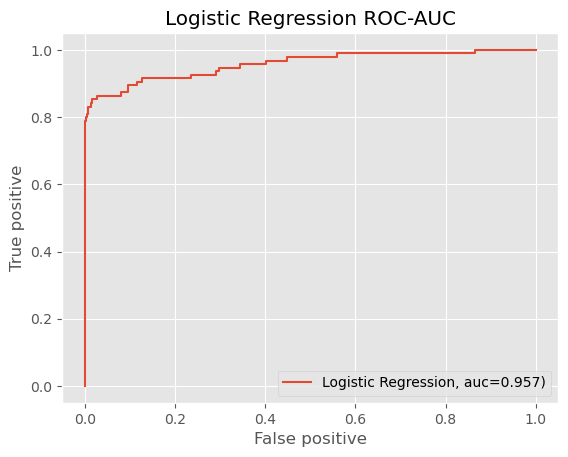

In [63]:
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('Logistic Regression ROC-AUC')
plt.legend(loc=4)

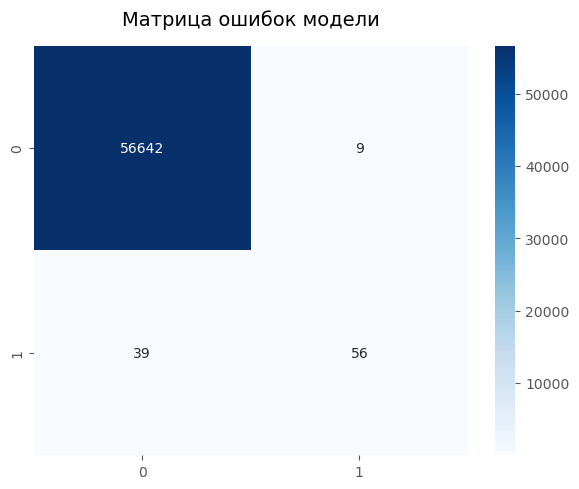

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
)
plt.title("Матрица ошибок модели", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Матрица ошибок показывает, что 56698 предсказаний были верными, 50 — ошибочными.

Истинно положительные: 56 — модель правильно определила 59 случаев мошенничества.

Истинно отрицательные: 56642 — модель правильно распознала 56 642 нормальную (немошенническую) транзакцию.

Ложно положительные: 9 — модель ошибочно пометила 9 обычных транзакций как мошенничество(Ошибка 1 рода)

Ложно отрицательные: 39 — модель пропустила 39 мошеннический случай, посчитав его нормальным(Ошибка 2 рода)

In [33]:
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56651
       Fraud       0.86      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [67]:
print("Accuracy Logit:", accuracy_score(y_test, y_pred))
print("Precision Logit:", precision_score(y_test, y_pred)) 
print("Recall Logit:", recall_score(y_test, y_pred))
print("F1 Score Logit:", f1_score(y_test, y_pred))

Accuracy Logit: 0.9991541254009093
Precision Logit: 0.8615384615384616
Recall Logit: 0.5894736842105263
F1 Score Logit: 0.7


## Применим GridSearchCV для подбора гиперпараметров

In [41]:
log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [49]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring='f1')
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_
log_reg

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

LogisticRegression(C=100)

In [53]:
f1_scorer = make_scorer(f1_score, pos_label=1)
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5, scoring=f1_scorer)
print('Logistic Regression Cross Validation F1-Score: ', round(log_reg_score.mean(), 3))

Logistic Regression Cross Validation F1-Score:  0.724


После оптимизации гиперпараметров модель улучшила F1-score для Fraud до 0.724. Это значит, что баланс между точностью и полнотой для редкого класса стал чуть лучше - модель теперь лучше распознаёт случаи Fraud, но это все равно не дает нам существенного результата. Дальше я применю другие алгоритмы машинного обучения, а после изучения методов балансировки вернусь сюда обратно